# <span style="color:blue">**Capítulo 16**</span>
## <font color=blue size=8> STING & CLIQUE </font>
### Agrupación Basada en Densidad y Cuadrículas

## STING: Algoritmo de Agrupación Basado en Cuadrícula

### En Pocas Palabras

Los algoritmos de agrupación para datos espaciales que has estudiado hasta ahora dependen de la consulta, en el sentido de que se escanea todo el conjunto de datos para cada consulta. Después de que se responde la consulta, no podemos reutilizar los resultados intermedios del proceso de escaneo para otra consulta. Por lo tanto, estas técnicas de agrupación son computacionalmente más complejas: $O(n)$. El algoritmo *STING* puede responder las consultas sin volver a escanear todo el conjunto de datos. *STING* significa *STatistical INformation Grid* (Cuadrícula de Información Estadística). A continuación, mostraré cómo se construye esta cuadrícula y cómo se utiliza para realizar consultas.

### ¿Cómo Funciona? 

Inicialmente, toda el área espacial se divide en celdas rectangulares, como se ve en la figura 16.1. 

<div>
  <img src="content/fig16.1.png" width="450"/>
</div>

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 16.1</p>

<p>Capas de STING.</p>

Como se observa en la figura 16.1, las celdas en diferentes capas difieren en su resolución, y cada celda de nivel superior contiene un resumen del conjunto de celdas de nivel inferior. Organizamos las capas en una estructura de árbol, lo que facilita una búsqueda rápida para una consulta. Por lo tanto, la complejidad computacional será $O(K)$, donde $K$ es el número de celdas de la cuadrícula en el nivel más bajo y ciertamente $K << n$, siendo $n$ el número de puntos de datos.  

Al principio, construimos la jerarquía de capas comenzando desde el nivel inferior, que contiene todos los puntos de nuestro conjunto de datos. Usamos propiedades estadísticas como media, desviación estándar, mínimo, máximo y tipo de distribución (normal, uniforme, gaussiana, etc.) para agrupar los puntos de datos en una celda. Luego, calculamos los parámetros de la celda en el siguiente nivel (más alto que el nivel inferior) usando los parámetros de las celdas de nivel inferior. Repetimos este proceso hasta llegar a la capa raíz mostrada en el diagrama.  

Una vez construida la jerarquía de celdas, se utiliza para consultar un nuevo punto de datos. Consultamos usando los siguientes pasos algorítmicos:  

- Comenzar en la capa raíz y proceder hacia abajo usando el índice *STING*.  
- Verificar la relevancia de cada celda en esta capa con respecto a la consulta utilizando la información estadística de la celda para construir un nivel de confianza. Seleccionar la celda con el nivel de confianza más alto.  
- Proceder a la siguiente capa considerando los hijos de la celda seleccionada anteriormente.  
- Repetir el proceso de manera recursiva hasta llegar a la capa inferior.  
- Ahora se pueden mostrar todas las regiones en varios niveles que han satisfecho la consulta.

### Ventajas y desventajas

La ventaja de esta técnica de agrupación es que la estructura es independiente de la consulta; todo el proceso se puede paralelizar fácilmente y también es posible proporcionar actualizaciones incrementales. Además, la complejidad, como se dijo anteriormente, es baja. La desventaja puede deberse a su naturaleza probabilística; se puede observar cierta pérdida de precisión en el procesamiento de consultas.

### Aplicaciones

Existen varios casos de uso donde un algoritmo basado en cuadrícula como *STING* puede aplicarse con éxito. Una de estas consultas puede ser encontrar una región que contenga un conjunto de casas que cumpla con un determinado criterio. La condición podría ser que la región debe tener un mínimo de 100 casas, de las cuales el 80% tenga un precio aproximado de un millón de dólares. Es decir, estás interesado en encontrar las regiones con residentes de alto perfil. Dado un conjunto de datos espaciales de casas en todo Estados Unidos, puedes construir una jerarquía de capas usando *STING*. Luego, al realizar este tipo de consultas, se identificarían todas las regiones del país que cumplan con los criterios deseados.

## CLIQUE: Algoritmo de Agrupación por Subespacios Basado en Densidad y Cuadrícula

### En pocas palabras

*CLIQUE* es un algoritmo de agrupación por subespacios que utiliza un enfoque de abajo hacia arriba para encontrar grupos. Comienza con subespacios unidimensionales y los va fusionando para calcular subespacios de alta dimensión. Se considera tanto basado en densidad como basado en cuadrícula. Proporciona una mejor agrupación en el caso de conjuntos de datos de alta dimensión.

### ¿Cómo funciona?

El algoritmo *CLIQUE* combina agrupación basada en densidad y en cuadrícula. Utiliza una técnica tipo *APRIORI* para encontrar subespacios que se puedan agrupar. Comienza agrupando en una baja dimensión y luego conecta los subespacios densos para formar grupos en un subespacio.  

Se basa en los siguientes principios:  
- Particionamos cada dimensión en el mismo número de clusters de igual longitud.  
- Todo el espacio $m$-dimensional se divide en unidades rectangulares no superpuestas.  
- Una unidad es densa si el número de puntos de datos que contiene excede un umbral predefinido.  
- Definimos un cluster como un conjunto máximo de unidades densas conectadas dentro de un subespacio.  

Así es como funciona el algoritmo:  
- Comenzar con un subespacio unidimensional.  
- Identificar los subespacios densos dentro de él.  
- Ordenar estos subespacios por cobertura, donde la cobertura es el porcentaje de puntos de datos dentro de un subespacio respecto al conjunto de datos.  
- Conservar los subespacios con mayor cobertura y eliminar el resto.  
- Encontrar las unidades de cuadrícula densas adyacentes en cada subespacio seleccionado usando una búsqueda en profundidad (*depth first search*).  
- Formar el cluster combinando estas unidades.  

Se inicia el algoritmo anterior con una unidad densa arbitraria. Se expande hasta alcanzar una región máxima en cada dimensión. La unión de todas las regiones forma el cluster.

### Ventajas y desventajas

Algunas de las ventajas son:  
- Algoritmo simple.  
- Escala linealmente con el tamaño de la entrada.  
- Escala bien con el aumento del número de dimensiones $O(C^k + mk)$.  
- Identifica automáticamente los subespacios de un espacio de datos de alta dimensión.  
- No presupone ninguna distribución canónica de los datos.  
- Insensible al orden de los registros en la entrada.  
- Los resultados son fácilmente interpretables.  

La principal debilidad es que la calidad del resultado depende de la elección del número y el ancho de las particiones y celdas de la cuadrícula.

### Implementación

La biblioteca *PyClustering* proporciona la implementación del algoritmo *CLIQUE* en la clase `pyclustering.cluster.clique.clique`. Solo necesitas crear una instancia de *clique* pasando los datos, el número de intervalos y el valor del umbral para formar un subespacio denso:

```python
clique_instance = clique(data, intervals, threshold)

Luego, se crean los clusters llamando al método `process` en la instancia creada:

```python
clique_instance.process()

Después de que finaliza la agrupación, se obtienen los clusters llamando al método `get_clusters`:

```python
clusters = clique_instance.get_clusters()


La biblioteca también proporciona métodos para visualizar los clusters formados.

## Proyecto

Instala la biblioteca *PyClustering* e importa las librerías necesarias.  

In [49]:
## !pip install pyclustering

In [50]:
from pyclustering.cluster.clique import clique, clique_visualizer

Se creó un conjunto de datos aleatorio de 5000 puntos bidimensionales utilizando una herramienta en línea (https://onlineintegertools.com/generate-integer-pairs).

In [51]:

data = [[-1, 2],[-1, 2],[5, 4],[1, -4],[-1, 0],[4, 3],[5, 3],[1, 2],[-3, 3],[-4, 3],[-3, -4],[-5, -1],[5, -2],[4, 3],[-4, -2],[1, 4],[0, -4],[2, -4],[2, 2],[5, 5],[1, -3],[0, 4],[-1, 3],[4, 0],[-3, -4],[-2, 1],[0, -1],[2, -3],[-4, -5],[-1, 1],[5, 4],[4, -2],[-4, -1],[-4, 3],[-5, -3],[1, -2],[-2, 3],[-5, -2],[-4, 4],[3, 0],[2, 4],[3, 0],[-2, 4],[1, 0],[5, -4],[-4, 2],[2, 5],[0, -3],[3, -1],[1, 1],[4, -5],[-2, 0],[-2, -3],[-5, -1],[5, -1],[-5, 1],[5, -1],[0, 3],[-3, -3],[0, 2],[-2, 4],[0, 2],[-4, 4],[-5, 2],[-3, 1],[-4, -2],[5, 5],[-4, -2],[0, -2],[4, -1],[-5, -1],[2, -3],[4, 3],[5, -2],[2, -4],[4, -1],[-4, -5],[4, 2],[-4, 0],[2, 3],[-1, -3],[-4, 3],[4, -1],[-4, -4],[2, 2],[2, -4],[0, 2],[-3, -3],[-5, -1],[5, 3],[5, 0],[5, 4],[1, -2],[2, -3],[-1, 2],[2, 3],[5, 1],[-4, 3],[1, 0],[-1, 5],[1, 3],[-1, -4],[4, 1],[-4, -4],[-5, 5],[-5, -4],[3, 0],[-1, -4],[4, -4],[-5, 4],[1, 5],[5, 2],[-2, 1],[5, 3],[-5, 4],[0, 0],[-3, 2],[-1, 1],[5, 1],[-2, 1],[5, 2],[4, -5],[1, 1],[-4, 0],[0, -3],[3, 5],[-3, 0],[-1, -2],[5, 2],[1, 3],[4, 3],[-3, -2],[4, 0],[-5, -4],[1, 0],[0, -4],[-3, 2],[-1, -4],[-5, -2],[-1, -2],[2, -5],[-3, 2],[5, -1],[-4, 4],[0, -2],[0, 5],[-1, 5],[3, -2],[3, 2],[-2, -2],[-2, -4],[-1, 2],[-1, 5],[-2, -4],[5, -3],[-5, -2],[-4, -2],[2, 4],[-3, -5],[-4, -4],[-2, -4],[3, 4],[-2, 0],[-5, 3],[2, -1],[2, 5],[4, 3],[-4, 4],[-3, 5],[-1, 5],[4, -2],[0, 4],[-2, -1],[0, 0],[-4, 2],[-2, 2],[4, -5],[-5, -3],[-5, -4],[-5, -5],[-4, -5],[-4, 0],[2, 5],[1, 2],[-3, -4],[2, 2],[-3, 0],[5, -4],[1, 3],[0, -4],[-3, 1],[-1, -4],[3, -3],[-4, 2],[1, -2],[5, -1],[-3, -5],[-4, 4],[-1, -5],[0, 0],[-2, 2],[3, 5],[-4, -3],[-1, -1],[-2, 2],[1, -5],[-1, -1],[5, 1],[5, 5],[0, 0],[1, 4],[3, 2],[-3, -3],[-2, 5],[5, -4],[-4, 1],[-4, -4],[5, 5],[4, -4],[-3, -1],[-3, -2],[-4, 4],[4, 0],[-1, 2],[0, -3],[-4, -1],[3, -5],[-4, -5],[-4, -4],[1, 4],[1, 4],[2, 2],[3, -1],[-4, -4],[-2, 5],[-1, 1],[-4, -3],[-1, 1],[4, -4],[-2, -2],[1, 2],[-1, 0],[0, 3],[-1, 5],[3, -3],[-3, 2],[2, -2],[-4, 4],[-5, 3],[1, -3],[1, -3],[-2, 5],[5, 2],[-2, -5],[1, 1],[2, -1],[1, -4],[-1, -4],[-4, -2],[4, -4],[4, -3],[-5, 2],[-2, 3],[-3, -5],[0, 4],[-5, -3],[-3, -4],[-1, -3],[2, -1],[-1, -2],[-4, 3],[-3, 5],[-1, 1],[-4, 1],[-2, -1],[-2, -2],[-3, -2],[-3, 1],[2, -3],[3, 4],[4, -2],[-5, 1],[-3, 0],[3, -4],[2, -2],[3, 0],[5, -3],[5, 0],[-4, 0],[-4, -5],[2, 4],[-5, 5],[4, 1],[0, -3],[5, -3],[1, -2],[-3, 4],[-1, 4],[-1, -2],[2, 1],[0, 5],[-5, -4],[4, 1],[3, 4],[-4, 0],[1, -1],[-2, 4],[-5, 2],[-4, -5],[-3, 0],[3, -4],[-5, -3],[-5, -5],[-5, 4],[-1, -3],[-1, -2],[-2, 1],[1, -1],[-3, -4],[2, -3],[-2, 2],[-2, -1],[-3, -5],[0, 1],[3, 2],[0, 1],[5, 5],[2, -3],[2, 3],[-1, 2],[1, -2],[0, -2],[-1, 2],[-2, -3],[1, -1],[1, -5],[4, 0],[3, -4],[5, 1],[1, -4],[-1, -4],[2, 5],[4, -1],[-4, 1],[-2, -2],[2, -5],[0, -4],[4, 1],[3, 5],[-2, -4],[-4, 0],[5, 5],[-4, -1],[1, -1],[-3, 1],[1, -5],[-4, 4],[4, -2],[2, 2],[3, 4],[-2, 1],[4, -3],[1, 3],[-4, 5],[2, -3],[-4, -2],[4, 3],[4, -2],[4, 5],[-2, -2],[-4, 5],[-3, 2],[5, 2],[-1, -1],[-4, 1],[2, -1],[-2, 2],[-3, 0],[-1, 2],[-5, 3],[0, 1],[-3, 5],[-3, -1],[3, -1],[2, 3],[-5, -5],[-5, 3],[-4, 2],[-5, 1],[-4, -2],[2, 4],[4, -3],[1, -5],[-4, 2],[-4, -1],[-2, -1],[-1, -1],[5, -4],[3, 4],[1, 2],[4, 4],[1, 2],[2, -4],[-2, -2],[0, 2],[4, -3],[-3, 3],[0, 5],[3, -4],[-2, 3],[-2, 0],[3, 0],[4, -2],[-2, -3],[3, -2],[2, 3],[-1, 0],[5, 1],[3, -2],[-1, 2],[0, -3],[-4, -4],[2, 5],[-4, 4],[4, -1],[-2, 0],[-3, 2],[-5, -2],[-1, -4],[-3, 3],[-4, 3],[-1, -1],[-2, -3],[4, 4],[-5, -3],[-5, -4],[4, 1],[-3, -3],[1, 2],[-4, 2],[4, -5],[4, 3],[2, 4],[4, 5],[2, -1],[3, -5],[3, -5],[3, 5],[3, 5],[2, 0],[-5, -2],[-4, 0],[4, 0],[-2, -4],[5, -1],[-1, 4],[4, -1],[3, -1],[-2, 5],[-1, 5],[5, -1],[5, -5],[4, 0],[-5, -3],[-4, 1],[-1, 2],[-2, -1],[5, 4],[5, 5],[-1, 0],[0, 0],[-4, 4],[-5, 2],[5, -2],[5, -5],[-4, -1],[5, -1],[-5, -4],[-4, -1],[-4, -2],[-1, 5],[1, 3],[-3, 4],[0, 2],[0, 1],[-2, 3],[2, -4],[2, -5],[2, 1],[-4, 2],[0, -5],[3, -3],[-1, -5],[3, 5],[1, 3],[-4, -4],[-5, -2],[2, -2],[4, 2],[4, 5],[-4, -4],[-4, 2],[3, -2],[1, 5],[4, 0],[2, 3],[0, -3],[4, 5],[5, -1],[3, -2],[4, 1],[-5, 5],[-2, -4],[0, 3],[1, 5],[-2, -1],[1, 3],[1, -5],[-5, -3],[-3, 4],[2, 1],[-4, -5],[-2, 0],[-2, 1],[1, 3],[0, 4],[-1, 3],[-5, -5],[0, 5],[4, -5],[-2, -3],[-5, 0],[4, 1],[4, 1],[2, -5],[1, 3],[-5, 2],[-5, 3],[2, 0],[4, -3],[5, 2],[0, 2],[4, 5],[3, 1],[-3, 2],[0, -5],[0, 4],[3, 1],[-3, 2],[5, -2],[2, -5],[-4, -3],[1, -3],[2, -2],[3, -5],[-3, 1],[-2, -4],[2, 3],[3, -3],[0, -2],[-3, 2],[2, 1],[0, -5],[4, 0],[2, 5],[2, -5],[5, 3],[2, -4],[4, 0],[4, 4],[0, 4],[-5, 0],[-1, 0],[1, -4],[4, 0],[0, -2],[-3, -1],[1, -4],[2, -4],[-2, 0],[1, -2],[-5, 1],[-2, 4],[-4, -1],[-5, -3],[4, 0],[-4, 4],[3, 3],[0, 0],[-5, -4],[-5, 1],[1, -5],[-4, 4],[0, 0],[-2, -3],[-4, -5],[-3, 3],[0, -1],[3, -2],[-2, 0],[4, 2],[4, 0],[-4, 5],[3, 1],[-2, -3],[-3, 3],[-4, 1],[5, -5],[0, 4],[-3, 5],[0, -4],[4, 2],[3, -5],[-5, 3],[0, -1],[2, 1],[1, -2],[0, -3],[-2, -5],[-3, -1],[1, -5],[-4, 2],[-5, 2],[2, 0],[-2, 5],[4, 2],[-2, 1],[0, -4],[0, -5],[-1, -1],[-5, 0],[5, 1],[2, -5],[4, 4],[0, 4],[5, 1],[-4, -2],[2, 1],[1, -5],[-2, -4],[0, -2],[4, -4],[-2, -2],[3, 1],[5, 2],[-2, -4],[2, -3],[2, 1],[-5, -2],[-3, -3],[-5, 2],[-5, 4],[-2, -5],[-3, -1],[4, 0],[0, -4],[-5, 2],[-1, -1],[-3, 0],[-2, -1],[4, 3],[4, 0],[0, 4],[2, 1],[4, 1],[-1, 0],[-2, -2],[-3, 3],[3, -5],[3, -5],[5, -5],[-5, -4],[-5, -1],[-5, -3],[-4, 5],[0, 1],[-2, -4],[5, -2],[-4, -4],[4, -3],[5, -3],[-2, -4],[2, -4],[5, 2],[-2, -4],[-4, 0],[-3, -2],[1, 0],[-1, 5],[1, 1],[4, -1],[0, 5],[1, 1],[5, -5],[-2, 1],[-3, 4],[-5, -3],[4, 1],[3, 2],[-3, -2],[-2, -4],[-2, -4],[1, -5],[-5, 3],[0, 5],[-5, 1],[-4, -4],[1, -3],[-5, 3],[0, -4],[-3, 3],[-3, 4],[1, 3],[-4, -4],[-5, -1],[5, 4],[1, 5],[-4, -4],[5, -5],[0, 3],[4, -1],[-2, 3],[1, -4],[0, -1],[4, -4],[-4, 5],[4, 1],[0, 2],[5, 2],[-1, 3],[-1, -4],[0, 3],[4, 3],[-3, 0],[-1, -4],[4, 2],[4, -2],[2, -4],[2, -2],[-3, -3],[2, -2],[4, -4],[-1, 2],[-5, 5],[5, -1],[3, -1],[-4, 2],[0, -5],[0, -2],[3, 3],[5, 1],[2, -2],[3, -4],[-1, 3],[4, -5],[-4, -5],[-2, 0],[-1, 1],[3, -2],[-2, 3],[3, 3],[-4, 3],[-1, 5],[-3, -3],[-5, -3],[4, -4],[-5, -4],[0, 2],[0, 4],[-1, 0],[5, 1],[1, 3],[-4, -4],[5, -5],[-4, -3],[1, -4],[2, 1],[-4, 3],[3, -1],[4, 5],[-1, -1],[0, -5],[-2, -2],[1, 5],[0, -5],[3, 0],[-5, -5],[4, -3],[-2, -4],[3, -5],[0, 3],[2, -5],[-5, 0],[2, -1],[-2, 5],[2, -4],[4, 5],[-3, 1],[0, 1],[-5, -5],[4, 5],[2, 0],[-1, -1],[-1, -4],[2, -3],[-1, 0],[-2, 1],[-4, 1],[4, 5],[0, 2],[5, 3],[2, -3],[-4, 1],[-3, 2],[-4, -4],[-4, -2],[3, 2],[3, 5],[-1, -3],[-2, -2],[1, 4],[1, 4],[-4, 4],[1, 1],[5, -5],[-2, 5],[-1, 4],[-5, 5],[1, -2],[2, 5],[1, -1],[5, 1],[3, 2],[4, 4],[3, -3],[1, 2],[3, 4],[-5, -5],[-4, -4],[-4, 0],[2, 1],[0, -1],[-3, 4],[-3, -3],[-2, 5],[3, 0],[-5, 1],[0, -4],[2, 2],[4, 3],[-4, -2],[-2, 5],[2, 1],[1, -4],[1, -2],[5, -1],[-5, 2],[-4, -1],[4, 4],[3, -1],[4, 0],[-3, -2],[-4, -1],[-2, 4],[5, 4],[0, 1],[3, 0],[-2, 4],[3, -2],[3, -3],[-5, 0],[0, 5],[-1, -5],[1, 0],[1, -1],[-4, -4],[-2, -4],[1, -4],[0, -5],[5, 4],[4, -5],[-2, -4],[4, 2],[0, 1],[2, 1],[-3, 3],[-3, -1],[-5, 0],[-3, -4],[4, -3],[1, 1],[2, -1],[4, -1],[2, -5],[3, -5],[5, -1],[0, 3],[3, 4],[0, 2],[-1, 2],[3, 4],[-4, 3],[-1, -4],[2, -4],[-4, 1],[-5, -5],[1, 3],[4, 4],[0, -5],[-5, 3],[-4, -2],[-1, -4],[0, 3],[0, 5],[-2, -4],[-5, -2],[-5, 0],[-3, 2],[5, -2],[-4, 2],[4, -2],[5, -1],[4, -5],[1, 3],[-4, -4],[1, 4],[-4, -4],[-3, -5],[0, 3],[2, -4],[-3, -3],[-4, -1],[-4, 4],[-5, 1],[5, -4],[-5, -4],[-2, -1],[3, 0],[2, -3],[3, 5],[-2, -3],[4, -4],[2, -1],[-3, 0],[2, 3],[-4, 2],[5, -2],[-3, -3],[0, 2],[-4, 0],[-3, -5],[2, -5],[-3, -3],[4, 1],[2, -4],[-3, 0],[1, 3],[-5, 2],[-4, 0],[3, 3],[3, 1],[-4, -4],[-5, 2],[4, 1],[-1, 5],[-2, 5],[-3, -2],[0, -1],[0, -2],[4, 5],[-2, 2],[-1, 3],[-3, 2],[-3, 0],[2, 1],[4, -4],[4, 5],[-3, 1],[-2, -4],[5, -2],[-5, 1],[-1, 3],[5, 1],[-3, -1],[2, -2],[-4, -5],[-3, 1],[-4, -5],[2, -4],[3, 0],[1, 3],[-3, 3],[-4, -1],[0, 4],[-1, -3],[1, 5],[-5, 4],[1, 5],[1, 1],[4, -1],[1, -2],[-2, -5],[4, 4],[-3, 0],[-3, -4],[-2, -3],[-2, -4],[1, -3],[5, 0],[-5, 0],[5, -5],[3, 0],[-5, 3],[-5, -3],[3, 0],[-5, -5],[4, 4],[1, 3],[4, -5],[4, -3],[4, -1],[2, 4],[-1, 1],[-4, 2],[5, 0],[-3, 3],[1, 5],[3, -3],[0, -3],[-1, -3],[-4, 5],[-5, 1],[-5, 3],[4, 1],[5, 5],[1, 2],[2, -3],[1, 0],[-5, 1],[2, 4],[-1, 4],[-3, 2],[-2, 2],[3, 3],[3, 0],[-5, 5],[3, 2],[-5, 4],[-4, 0],[5, 5],[-4, 1],[-3, -3],[-5, -5],[1, 5],[-1, -3],[0, -4],[-2, 0],[0, -4],[0, -2],[1, -2],[-2, -3],[3, 1],[-2, -2],[1, 4],[-5, 5],[-3, -2],[4, -2],[-5, -3],[2, 4],[-4, -2],[-4, 0],[-3, -1],[-5, -2],[2, 0],[-1, 0],[3, 1],[0, 4],[2, -1],[-2, -2],[-3, -2],[-5, 1],[0, -4],[-4, -4],[-1, -4],[-3, 0],[1, 2],[-4, 5],[-5, 0],[-1, -4],[-2, -3],[3, -3],[-3, -1],[-2, 5],[2, 3],[5, 4],[2, 0],[2, 4],[-3, -3],[-5, -4],[-5, 2],[2, 5],[0, 0],[4, -2],[5, -5],[4, 1],[-5, -5],[3, 2],[0, 0],[-5, -2],[-4, 0],[3, -3],[-3, -2],[2, -1],[1, -5],[-4, -1],[3, 5],[4, -4],[-4, -3],[-3, -4],[-1, 3],[4, -4],[5, 1],[3, -1],[-1, 2],[0, 3],[-3, 0],[-3, -3],[0, -1],[4, 1],[1, 0],[4, -1],[-3, -1],[-3, -1],[-2, -2],[4, -4],[-2, -1],[2, 4],[3, -2],[-2, -2],[-4, 5],[-5, 1],[3, -1],[2, 1],[3, 5],[2, 1],[3, 3],[-3, 0],[3, -5],[-3, -1],[-5, 2],[-3, 2],[3, -2],[4, 5],[4, 1],[-5, -4],[-1, 5],[-4, 5],[1, 5],[4, 5],[3, -5],[3, 0],[0, -4],[0, -3],[2, -3],[1, 4],[-5, -2],[-2, 2],[5, 5],[0, -1],[3, -3],[-5, 2],[0, -2],[-1, -2],[-4, 2],[3, -3],[5, 5],[2, -3],[0, 0],[-5, -4],[2, -1],[-5, -5],[1, 2],[1, 4],[3, -3],[-1, -3],[5, 2],[0, -4],[0, -5],[4, -3],[0, 1],[0, 4],[0, -1],[4, -3],[1, -2],[-5, 0],[0, 1],[-3, 4],[0, 3],[-3, 2],[3, 2],[-5, -5],[5, -1],[4, -3],[-5, -3],[-4, 5],[-5, -3],[-3, 5],[-2, 0],[-4, 2],[3, -2],[0, -5],[5, -1],[3, -5],[1, 2],[0, 1],[0, -4],[1, -5],[-4, -3],[-1, -2],[-3, -5],[-2, -1],[-1, 5],[-5, 1],[1, -3],[5, -1],[-4, 2],[3, 5],[-1, -4],[5, 0],[3, -3],[-4, -4],[-2, 0],[-1, 4],[-4, -4],[3, -4],[1, -3],[3, -1],[-5, -4],[2, 3],[-2, -5],[-3, -2],[0, -5],[3, 5],[2, -4],[2, 1],[0, 4],[-4, -5],[-4, 3],[2, -5],[-3, -3],[3, 2],[-1, 5],[-3, 3],[3, -4],[-5, 5],[1, 1],[1, 3],[2, 2],[-5, 0],[-4, 2],[-4, -4],[2, 3],[0, -1],[2, 5],[-3, -1],[2, -5],[0, -3],[-1, 2],[-3, -5],[2, -4],[1, -4],[4, 0],[1, 4],[1, -5],[0, -3],[2, 5],[-4, -4],[-3, 5],[1, -5],[-4, 2],[-2, -5],[-5, -3],[2, 4],[-3, 0],[-3, 4],[5, -4],[4, -4],[-5, 5],[3, -4],[-3, 4],[3, -3],[-2, 4],[-5, 1],[4, -1],[-4, 4],[5, 2],[-5, -2],[3, 5],[0, -1],[1, 1],[-2, -1],[0, 2],[0, -3],[4, 0],[-4, 2],[-5, 2],[-2, -5],[-5, -3],[2, 3],[4, 4],[2, 4],[5, -5],[-3, 4],[2, 4],[3, -2],[4, -1],[4, -1],[-5, -4],[-4, -4],[-3, 5],[5, 4],[0, 1],[5, 3],[-5, 1],[2, -3],[-3, 0],[-2, 0],[3, -3],[-3, 4],[2, -2],[4, -4],[-4, -5],[-5, -2],[-4, -4],[4, -5],[-5, 5],[-4, -5],[-4, -1],[1, -3],[4, -5],[5, -4],[4, 1],[-3, 3],[-1, 3],[4, 2],[1, 4],[5, -5],[3, -1],[-1, -1],[-1, 0],[-5, -5],[3, -2],[-3, -4],[-2, 5],[2, -3],[4, 1],[1, -3],[-5, 2],[1, 3],[3, -3],[5, 3],[-2, -4],[0, -1],[0, -3],[2, 2],[0, 0],[1, 0],[4, 4],[-5, -2],[1, 4],[3, 1],[2, 5],[-1, -1],[4, -4],[-5, 4],[-1, -4],[5, -3],[-1, 2],[3, 4],[2, -5],[-3, -4],[-1, 2],[-3, -3],[4, 0],[-3, 5],[4, 0],[4, -1],[2, -1],[4, 3],[-4, 1],[-1, -1],[3, 1],[4, -1],[2, -4],[-2, -1],[0, 1],[-1, -3],[0, 1],[0, -4],[-5, -3],[4, 1],[2, 3],[0, 4],[-1, 3],[2, -2],[-1, 4],[-5, -4],[2, 1],[3, 0],[-4, -1],[-5, 4],[-4, -2],[0, 3],[-5, -4],[4, 1],[-2, 2],[-5, 0],[4, 4],[0, 0],[-1, -5],[-1, 1],[-4, 4],[5, 1],[-1, -1],[2, -2],[2, -3],[-1, 4],[5, 1],[-1, 0],[-5, -2],[-1, 0],[1, 2],[2, 5],[4, 3],[-4, -3],[3, 0],[1, -1],[-4, -2],[-2, 4],[2, -5],[-3, 4],[-4, 1],[-5, -4],[3, -2],[-5, -3],[2, 4],[-5, -4],[4, -1],[-1, 3],[1, 5],[-2, 0],[3, 1],[5, -3],[3, 4],[2, -5],[-5, -3],[2, -5],[-3, 5],[0, 3],[1, -2],[3, 0],[2, -4],[3, 5],[-5, 0],[0, 1],[1, -2],[-2, -5],[-1, 5],[-2, -5],[-4, -1],[-4, 5],[1, -4],[-2, -2],[4, 1],[-4, 0],[3, -5],[0, 0],[1, -5],[4, -5],[5, -4],[-2, -3],[4, 3],[3, 2],[5, -5],[2, 0],[0, 1],[1, 2],[2, -1],[-5, -4],[2, -5],[-3, -1],[-5, -3],[5, 4],[4, 0],[-1, -2],[3, 3],[1, 3],[1, -3],[1, 1],[0, 4],[4, 4],[3, 2],[2, -1],[5, 1],[-5, -1],[-1, -2],[4, -1],[-4, 4],[2, 4],[-1, 5],[2, 5],[-1, 4],[3, -3],[2, 2],[3, -5],[-5, -5],[5, 0],[2, -2],[-2, -3],[-5, -4],[1, -3],[-1, -5],[0, 1],[-2, -3],[2, 0],[-3, -2],[-5, 5],[-3, -4],[-2, -3],[4, 5],[5, -4],[2, -1],[0, -2],[-1, 3],[3, -3],[0, 2],[-3, 1],[-3, 5],[-2, 4],[-4, -1],[1, 0],[-2, -4],[0, 2],[1, -5],[0, 5],[-5, -4],[2, -2],[-5, -1],[3, 5],[4, -5],[2, -3],[-4, -3],[-5, 4],[0, 3],[1, 1],[-1, -3],[-1, 2],[0, 5],[5, 5],[2, -2],[-1, -3],[-2, -4],[-1, 5],[-1, -2],[5, -1],[3, 2],[-2, -4],[2, -1],[-1, -2],[-3, -4],[-5, 5],[5, -5],[5, 3],[3, -3],[4, 4],[0, 1],[-3, -2],[0, 1],[3, 4],[0, -3],[4, 4],[-1, -1],[1, 1],[-4, 1],[-3, 0],[-1, 5],[-4, 5],[-4, -3],[-2, 0],[0, -3],[1, 5],[0, -2],[-2, -1],[-1, 0],[-2, 4],[5, -3],[2, -1],[4, 2],[-2, -4],[-3, 2],[-1, -3],[-4, -2],[-3, -2],[1, 2],[-2, 3],[5, 5],[4, 2],[-1, 1],[4, -3],[5, -5],[3, 2],[4, -4],[-3, 0],[-3, 5],[-5, 2],[3, 0],[2, 0],[5, -4],[-4, -5],[0, 0],[3, 4],[5, -2],[-5, 3],[5, 1],[0, 3],[-5, -2],[-2, 1],[-5, -3],[-4, -3],[0, -3],[-4, -4],[-1, 4],[-2, -4],[-1, 3],[0, 0],[4, -1],[-1, 4],[3, -1],[5, 3],[2, 5],[-3, -3],[0, -2],[-4, 1],[4, -2],[0, 4],[3, 5],[2, 4],[4, -2],[-3, -2],[-5, 3],[-2, -4],[4, -1],[-1, -3],[3, 1],[-1, -3],[4, -4],[5, 0],[1, 2],[-1, -3],[-1, 4],[-4, 1],[3, -5],[-2, 1],[-4, -2],[-5, 4],[2, 4],[5, -2],[-1, 0],[1, -4],[-3, -5],[-1, 2],[2, 4],[-4, 5],[-4, -1],[-2, -4],[-2, -2],[2, -4],[0, 2],[1, -3],[0, -5],[1, 3],[-5, -5],[2, -5],[-1, -5],[4, -2],[-5, 4],[2, -4],[3, -5],[-3, -2],[-3, 5],[5, -2],[3, 0],[3, 4],[-2, -5],[1, 1],[-4, -5],[-3, 3],[3, 0],[1, 3],[1, -5],[-1, -3],[0, 2],[5, 3],[3, 2],[3, -3],[2, 2],[-4, 0],[2, 3],[0, 4],[4, -2],[-4, -4],[0, 4],[-4, -3],[3, 2],[-2, -5],[1, -2],[5, -2],[3, 1],[-2, -1],[1, 4],[-2, -1],[5, 5],[-2, -3],[-4, 1],[-4, -1],[-3, 5],[3, -2],[-3, -2],[-2, -1],[2, 2],[2, -5],[-5, -4],[-2, -5],[-3, -3],[3, 2],[-2, -1],[-4, 3],[5, -5],[5, -1],[-4, 1],[-3, -1],[3, -5],[3, 0],[3, -4],[3, 0],[0, 2],[-2, 2],[-4, 0],[-4, -2],[0, 3],[-2, -1],[4, -5],[-4, -5],[-2, 3],[-4, 1],[-5, -2],[0, 4],[2, 4],[3, 0],[-3, -3],[0, 4],[-3, 4],[2, -5],[-4, 0],[-4, -4],[-2, 3],[2, 2],[-4, -3],[-3, 5],[-4, -5],[-1, 2],[5, 5],[0, 5],[3, 5],[-1, -4],[4, -2],[-2, -2],[-1, 0],[-4, -3],[0, 5],[5, 0],[-1, -4],[1, -3],[-1, -2],[-5, 4],[-2, 5],[-4, 2],[0, 2],[2, -4],[0, -3],[2, 2],[-2, 4],[1, -1],[1, 2],[-1, -3],[-3, 2],[3, 3],[3, 5],[1, -4],[-3, 0],[5, 0],[3, 1],[2, 4],[1, 4],[-4, -3],[-5, -2],[0, 5],[-1, 3],[-2, -4],[-3, -4],[-5, 1],[-1, -1],[2, 1],[-4, -2],[-5, 2],[5, -4],[3, -3],[-5, 5],[3, 1],[-1, 4],[-5, 5],[0, -3],[4, 4],[-1, 4],[2, 3],[4, 0],[-4, -2],[0, 4],[5, -2],[2, 5],[2, 4],[-3, 0],[5, 2],[-2, 1],[-3, 3],[-2, 3],[5, 1],[-2, 2],[-3, 0],[4, -5],[0, 3],[1, 4],[0, 2],[-1, -2],[4, 1],[2, -3],[-1, -4],[4, 0],[4, 3],[-4, 2],[2, 2],[1, 1],[-5, 0],[0, -3],[1, -1],[2, -4],[2, -1],[5, 0],[-1, 2],[3, 2],[2, -3],[0, 0],[0, -2],[-4, 3],[2, 0],[-3, 4],[-3, 2],[-2, -2],[1, 4],[-4, 5],[-4, -5],[-1, -3],[1, 3],[-2, -5],[3, 1],[1, -3],[4, 2],[-3, -3],[5, -2],[1, 1],[-1, 0],[-3, 1],[-1, -3],[-4, 3],[0, 1],[4, -3],[1, 0],[2, 3],[-2, 5],[1, 4],[4, 4],[0, -2],[-3, 1],[-2, -3],[2, 2],[-4, -4],[5, 0],[-1, 5],[-4, 5],[-4, 1],[3, 3],[-2, -2],[-5, 5],[4, 3],[-2, 5],[-3, 3],[-4, 1],[2, -1],[2, 2],[-3, 5],[-1, 3],[4, -3],[2, -5],[5, 1],[-3, -1],[-1, 1],[2, 1],[-2, 0],[1, -3],[-1, -5],[-3, 1],[2, 5],[3, -1],[-5, 2],[-5, -5],[-2, -4],[-1, -3],[2, -2],[-4, 3],[3, 5],[1, -5],[1, 4],[3, 2],[0, 0],[-4, 1],[0, -3],[3, 5],[-1, -3],[0, -5],[1, 1],[4, 3],[-4, -1],[0, -4],[-1, 5],[4, 1],[-1, 4],[3, 2],[3, -2],[1, 2],[5, 5],[-2, 0],[-2, 4],[-4, 0],[0, -4],[3, -3],[-4, 2],[-1, 0],[3, 0],[5, 1],[3, -5],[5, -2],[5, -1],[1, 0],[1, 5],[2, 3],[2, 3],[-4, -3],[-1, 5],[-4, 4],[2, 0],[-2, -2],[1, -4],[2, -3],[2, 5],[-1, 5],[-1, 1],[4, 4],[1, -4],[-5, -5],[-4, 2],[-5, 5],[-5, -5],[-5, 4],[-3, 0],[5, 1],[2, 4],[3, 3],[-2, 1],[4, -4],[-3, -2],[0, 4],[5, -5],[-3, -4],[3, -5],[0, -2],[5, -2],[-2, 5],[2, 3],[2, 0],[1, -2],[0, -3],[1, -1],[2, 2],[4, -4],[-4, 5],[-4, 0],[4, -5],[-4, -1],[-4, 5],[4, 3],[5, 0],[1, 0],[-5, -1],[5, 4],[0, 3],[2, -1],[-5, 4],[-3, 3],[-4, -4],[-5, 1],[4, 0],[-2, 1],[1, -5],[1, 4],[5, -1],[-4, 1],[-5, -3],[1, 3],[-5, -5],[-3, 5],[-2, -2],[2, -2],[4, 4],[3, 5],[-2, -4],[-1, 5],[4, 0],[-3, -3],[5, -1],[-4, 4],[-4, 3],[1, -2],[3, -4],[0, 1],[1, 2],[-4, -4],[-4, -1],[5, -1],[5, 3],[1, -4],[-4, 3],[-3, 5],[4, 0],[-5, -5],[-3, -4],[5, 2],[2, 1],[-1, 2],[2, 2],[5, -3],[-1, -1],[-5, -1],[4, -2],[4, -5],[-3, -3],[-5, -5],[5, -2],[5, 3],[2, 0],[-4, -4],[-1, 2],[0, -4],[-5, 0],[-5, 1],[5, -5],[5, 5],[-3, -5],[2, 5],[2, -1],[4, -2],[4, 4],[2, -5],[-4, -4],[2, 5],[1, -4],[4, -4],[0, 1],[3, 4],[3, -2],[2, -2],[-2, 5],[0, 5],[-5, 1],[-4, 3],[1, -4],[-2, 1],[1, -4],[0, -5],[3, 4],[-4, 1],[3, 3],[-2, 4],[4, 1],[-5, 4],[4, 3],[-5, 4],[-4, 0],[-4, 5],[-1, 0],[-5, 0],[1, -2],[-5, -2],[2, 4],[-5, -2],[-2, 0],[-3, 0],[-4, -4],[-1, 0],[1, -4],[1, 5],[-2, -3],[2, -3],[4, 5],[-3, 3],[0, 0],[-2, 4],[0, -2],[1, -5],[0, 0],[1, 3],[2, 1],[-3, -5],[0, -5],[2, 0],[-5, 1],[-5, -2],[1, -1],[2, 4],[-4, 1],[-2, 2],[1, -5],[3, 0],[5, 2],[3, 0],[0, 3],[2, -5],[-3, 0],[4, -4],[-3, -4],[-2, 2],[-5, 5],[0, 0],[-1, -4],[2, -3],[-3, 4],[2, 2],[-2, 0],[4, -4],[-4, 5],[-5, 1],[2, 4],[-4, -1],[-3, 3],[3, 2],[-3, -1],[0, 5],[-3, -1],[-4, -2],[-2, 5],[-4, -2],[3, 5],[2, -3],[2, -1],[3, 0],[1, -5],[0, 3],[-2, 4],[3, 1],[2, -5],[-5, 1],[1, 4],[-2, 4],[5, -1],[0, 3],[5, -3],[2, 0],[4, -2],[0, -4],[-3, -4],[-4, -2],[-2, 5],[-5, 3],[-5, 1],[-5, -1],[2, -2],[0, 1],[0, 4],[3, 2],[3, -2],[0, 4],[3, -1],[0, 1],[0, 2],[-5, 5],[-3, -2],[-1, 4],[-5, 1],[-4, 1],[-5, -3],[-2, 2],[2, 5],[-4, 1],[-4, 2],[3, 3],[-3, 2],[-2, 2],[3, -4],[3, 1],[-3, 5],[-2, 4],[4, -3],[3, 5],[2, 1],[-2, 1],[-3, -3],[-2, -4],[-5, 0],[-1, -1],[1, -1],[3, -2],[-2, 5],[4, 1],[0, 5],[-1, -3],[1, 5],[2, -1],[1, -4],[3, 0],[2, -2],[-1, -4],[5, -3],[-2, -2],[3, 2],[-5, -5],[2, -1],[4, 0],[5, 5],[2, -5],[3, -1],[-5, 2],[2, 5],[-5, -5],[-1, -3],[0, -3],[-2, 5],[1, -2],[-3, 4],[-1, 5],[-4, 4],[3, -2],[0, -1],[-1, 3],[5, -5],[1, -4],[3, -4],[1, -5],[-4, -1],[1, -2],[-4, 2],[-4, -2],[-5, -3],[2, -5],[-2, -3],[0, 5],[4, -1],[1, 5],[0, -4],[1, -5],[-4, 0],[3, 0],[-5, 0],[-1, 0],[-5, 5],[1, 1],[5, -2],[2, 3],[4, 2],[-5, -5],[-5, 1],[1, 0],[-2, 1],[-5, 5],[1, 3],[0, -3],[5, -2],[1, 5],[-5, 5],[2, 0],[-5, 3],[-4, 5],[0, -1],[-3, -3],[2, -2],[-4, 1],[1, -1],[2, 3],[-4, -2],[-2, 3],[-3, 4],[4, 5],[2, 5],[-2, 2],[4, -4],[4, 5],[-3, 3],[-4, 1],[-3, 5],[-5, -4],[3, 1],[0, -2],[-3, -5],[5, -1],[1, 1],[4, 0],[-4, 3],[-2, -1],[-4, -4],[2, 5],[5, -5],[4, -3],[5, -1],[0, -4],[-3, 5],[5, 3],[-1, 0],[-2, 1],[-3, -3],[3, -5],[0, -1],[5, -3],[5, -3],[1, -4],[4, -2],[-3, -4],[2, 4],[-3, 2],[0, 1],[5, 1],[-3, -4],[5, 1],[-2, -3],[-4, -1],[1, -2],[1, 3],[0, 3],[3, -2],[1, 0],[-3, 0],[-1, 5],[4, 2],[-5, -4],[4, -4],[-2, 2],[-4, -1],[-3, 1],[0, 1],[2, 0],[-2, -2],[3, -5],[-1, 4],[5, 0],[2, 5],[0, 1],[-3, 4],[-4, -3],[5, 5],[3, 3],[2, -1],[-3, -4],[-2, -5],[-4, -2],[-2, -1],[5, -2],[-2, 5],[2, 3],[0, 0],[-4, -1],[-4, -3],[-5, 5],[-3, -2],[3, 3],[-1, 3],[-3, -4],[1, -3],[-3, 2],[-2, -4],[0, -2],[-4, -2],[1, -2],[4, 2],[0, 0],[2, 5],[2, -4],[1, -4],[3, 4],[4, 4],[-4, 5],[-1, 4],[5, 5],[4, -3],[-4, 5],[1, 2],[-2, 2],[-4, 2],[-5, -4],[3, 3],[-5, 4],[-5, -5],[0, 2],[3, -5],[-3, 1],[-2, -4],[5, 5],[2, 5],[0, -4],[1, -1],[-1, 5],[-2, -4],[5, -2],[-2, 0],[3, -3],[-3, 0],[-1, 4],[3, 4],[4, 0],[3, 1],[-3, 4],[3, 4],[2, -3],[-3, -4],[-4, 4],[0, -3],[4, -2],[-1, 0],[1, 1],[2, 3],[-5, 0],[-2, -3],[5, 0],[-3, 4],[-2, -1],[-3, -2],[-5, 5],[-2, 4],[2, -2],[2, -3],[2, 1],[-1, 4],[1, 2],[-3, -5],[-4, 3],[0, 0],[-1, -2],[4, 4],[3, -3],[-5, 0],[-1, -3],[3, -3],[3, -3],[-5, 2],[-4, 1],[1, 4],[-2, 3],[4, -3],[2, -3],[0, 0],[2, -3],[0, 5],[1, 0],[3, -5],[4, 4],[2, 4],[0, -2],[-2, 1],[0, -5],[1, 3],[2, -5],[-4, 3],[5, -3],[-4, -4],[-3, 5],[5, 3],[-1, -1],[3, 0],[2, 2],[0, -5],[2, -3],[5, -5],[-2, -1],[2, -4],[4, 5],[-3, 5],[0, 0],[-1, 0],[-2, 3],[4, -3],[-5, -1],[5, 2],[3, -5],[1, 1],[-3, -3],[-5, 2],[-4, 2],[-3, 4],[-1, 2],[-5, 1],[3, 1],[-2, -5],[1, -3],[5, 1],[3, 4],[-1, -3],[0, -1],[-4, 1],[0, 4],[-1, -1],[-4, 3],[-3, -4],[-4, 1],[-4, 5],[-3, 0],[1, 3],[2, -4],[2, 0],[4, 3],[-4, -2],[1, 3],[-1, 1],[-1, -3],[-2, -3],[3, 4],[-2, -3],[0, -4],[1, 0],[-3, -5],[5, 0],[-4, -2],[5, 5],[-4, 2],[-2, -4],[1, 2],[5, 4],[4, -1],[-5, -4],[-3, 4],[-3, 5],[4, -1],[5, 3],[-1, 4],[4, -1],[4, 3],[-4, 2],[-4, -3],[0, -1],[4, 3],[0, 1],[-3, -4],[-2, 5],[-1, 1],[2, -2],[5, -4],[-2, 2],[2, -5],[1, 4],[2, 0],[-1, 0],[-1, -3],[-3, -5],[3, -2],[3, -4],[4, -5],[2, 3],[-5, 2],[5, -2],[-4, 3],[-1, 0],[1, 5],[-4, 2],[2, -1],[-5, 5],[4, -2],[5, 5],[2, -4],[-5, 1],[4, 5],[-1, -5],[0, 2],[-3, 3],[1, -1],[3, 3],[2, 1],[-5, 1],[-5, -2],[5, -5],[-5, 1],[2, -5],[5, -4],[-5, 1],[-1, 1],[0, 5],[-5, -2],[3, 1],[2, 1],[2, -4],[1, -5],[-4, -5],[1, 3],[3, 2],[5, -2],[0, 3],[-4, 3],[0, 0],[3, -2],[0, -4],[5, -3],[-2, -4],[2, -3],[-1, -5],[-1, -2],[1, 5],[-1, 2],[5, -5],[-1, -5],[0, -4],[2, 1],[1, 1],[4, -5],[3, -1],[-4, -5],[-2, -3],[-5, 0],[-5, 1],[1, 1],[-1, 4],[-3, 5],[2, -2],[1, -2],[1, -5],[3, -3],[0, -3],[0, -5],[5, 4],[5, -4],[-1, 1],[1, -1],[1, -4],[-1, -2],[3, -4],[-4, 0],[-5, -1],[-1, 3],[-5, 0],[5, -5],[3, -3],[-5, 0],[4, 3],[3, 0],[-1, -3],[-3, -3],[0, 5],[-2, 1],[-5, -1],[-3, 2],[0, -2],[4, -1],[4, 4],[-1, -5],[4, 4],[-2, 2],[0, 4],[0, 5],[-1, 0],[0, 3],[-4, -1],[-2, -5],[3, -3],[-3, -5],[2, -5],[5, -2],[2, -4],[4, 4],[5, 0],[1, 5],[-1, 5],[-3, 4],[-4, -3],[-4, 5],[-4, 4],[-4, 3],[-1, -5],[-5, -4],[2, 2],[5, 5],[-1, -3],[4, -5],[3, 5],[4, -5],[3, 3],[-2, -2],[-5, -1],[-1, -3],[-2, -4],[4, -4],[5, 5],[5, 4],[0, -1],[-2, 2],[5, 2],[-5, 3],[0, -3],[-5, 0],[-5, 5],[1, 0],[3, 2],[5, -2],[0, -1],[0, 2],[2, 0],[-5, -1],[0, -4],[-3, 1],[3, -2],[2, 5],[-4, -1],[1, -1],[5, 4],[3, 4],[-2, 3],[3, 0],[1, -5],[2, -2],[-2, -4],[-3, 4],[0, 3],[1, 4],[-5, 4],[2, -4],[-3, -2],[2, 1],[1, 2],[2, 0],[-3, 1],[-4, -5],[0, 5],[5, 5],[0, 5],[5, -5],[2, -1],[-3, -5],[4, -2],[3, 0],[-5, 1],[0, -3],[-3, 2],[1, 3],[-1, 1],[-5, 4],[1, 4],[5, -3],[-3, 1],[1, -1],[-1, 4],[2, 5],[-5, 1],[4, -1],[0, 3],[-4, 3],[5, 3],[1, -4],[4, 0],[3, -1],[-3, 0],[5, 0],[-2, -4],[-5, -4],[2, -2],[4, 5],[-5, 5],[-5, 2],[-3, -5],[-4, -1],[3, 5],[0, 2],[5, 3],[-3, -4],[4, 5],[3, -5],[4, 0],[0, -1],[2, -1],[-3, 4],[0, 4],[-2, 3],[0, 2],[4, 1],[-1, -3],[4, 3],[-5, 3],[-1, 0],[0, 2],[0, 0],[3, 5],[0, 5],[0, 5],[2, -5],[-5, -2],[0, -1],[4, -5],[-5, 0],[2, 0],[-3, -2],[-2, -1],[-2, -2],[-5, 4],[5, 3],[-4, 1],[4, 4],[4, -3],[-2, 2],[5, -3],[-4, 3],[4, -5],[0, 3],[1, -4],[-2, -4],[3, -4],[-3, -5],[-2, -2],[1, -5],[0, 0],[3, -5],[3, 3],[-2, -3],[1, 4],[2, 2],[1, 3],[4, 0],[0, -5],[4, 1],[5, -5],[4, 1],[-2, -1],[5, 5],[5, 2],[-1, -3],[1, 1],[-3, 3],[-2, -1],[2, 5],[0, -5],[-2, -5],[4, 0],[-3, 1],[1, -1],[3, 4],[-5, -3],[-3, -3],[2, 2],[-2, 3],[1, 1],[1, -1],[2, 1],[3, 5],[3, 4],[1, 4],[3, -2],[-1, -3],[3, -5],[-2, -4],[5, 4],[1, -3],[-1, 5],[4, -2],[1, 4],[3, -5],[0, -1],[-1, -4],[2, 1],[5, -5],[3, 1],[-4, 3],[3, -2],[1, -5],[3, -4],[0, 5],[4, -1],[-2, -4],[-1, -3],[1, -3],[2, -1],[-3, -4],[-4, -3],[-3, 3],[-4, -2],[0, -5],[-4, -2],[0, -3],[1, 5],[3, -3],[2, 2],[-4, 1],[-2, 5],[3, -5],[-5, 2],[4, -5],[-1, 5],[-3, 3],[0, 5],[4, 0],[-1, -4],[-4, 3],[5, 0],[-4, -3],[0, 4],[-2, 3],[3, 2],[0, 0],[1, 4],[0, 2],[4, -3],[-2, -1],[1, 0],[-5, 0],[1, 1],[1, 2],[-5, 1],[-4, -4],[-2, 2],[-4, 4],[2, 1],[5, -1],[-2, -3],[-2, -4],[3, 4],[1, -3],[-4, 1],[0, -5],[-2, 3],[-3, -2],[-3, -1],[-3, 3],[5, -5],[3, 5],[-3, -3],[3, 1],[2, -5],[0, 1],[1, -3],[-3, 1],[-1, 2],[-2, -4],[4, 2],[4, -3],[-4, 1],[5, 1],[-3, 4],[-5, 4],[-2, -3],[-1, 0],[-5, -2],[3, 1],[2, 4],[-4, 5],[-4, 4],[-2, 0],[3, -2],[3, 3],[-3, -4],[-2, 4],[1, 1],[-5, 3],[-5, 4],[2, -1],[1, 1],[3, -3],[1, 4],[5, -4],[5, 1],[0, -3],[4, -3],[2, 3],[1, 4],[-5, -3],[-2, -4],[-4, 5],[2, 1],[-1, 4],[-3, 0],[2, 4],[1, -5],[5, 2],[-5, 1],[2, 0],[-3, 4],[1, 2],[1, -3],[0, -4],[4, -4],[2, 0],[5, -1],[2, 2],[1, -2],[-1, -1],[-1, 5],[-5, -1],[1, 4],[2, -3],[-2, -4],[2, 0],[1, -1],[-3, -4],[3, -3],[-5, -4],[2, -1],[-4, -1],[-4, -4],[2, 5],[-5, 3],[-2, -2],[4, 2],[1, 5],[-4, 4],[3, 5],[-5, 3],[-2, -4],[3, -5],[0, -3],[2, 5],[5, -4],[-5, -4],[3, -5],[1, 2],[3, 5],[3, -4],[2, 0],[3, -2],[-4, 5],[5, 2],[-1, 0],[5, -1],[-2, 3],[-3, -4],[0, 3],[1, -2],[2, 4],[1, -2],[1, 2],[-1, 2],[-5, 5],[-1, 1],[4, -4],[-2, 0],[4, -4],[1, 2],[-3, -1],[-4, 2],[-4, -4],[1, -2],[-3, 3],[3, -1],[4, 1],[5, -5],[-5, 0],[-4, 4],[0, 5],[-1, -3],[5, -4],[3, 4],[3, 5],[0, 4],[-5, -4],[-5, -4],[5, 3],[-4, 2],[-2, -1],[-2, -1],[-2, 5],[-4, 4],[-2, 3],[2, 4],[0, 1],[-5, -3],[-4, 5],[2, 3],[5, -1],[1, -2],[-4, -1],[-4, 3],[-2, -5],[1, 1],[4, 0],[0, -5],[0, 0],[3, 4],[-4, 1],[0, -1],[-3, 5],[-3, -5],[-2, 0],[-4, 0],[-5, 4],[-5, 5],[-2, -4],[5, 2],[1, -4],[-1, 4],[2, -2],[2, -4],[-2, -1],[-4, 2],[1, -1],[4, 3],[-5, 1],[5, -4],[5, -4],[2, -3],[-1, 0],[-1, 4],[-5, 2],[4, 0],[-3, 3],[-3, 2],[-5, -4],[3, 2],[-3, -5],[-1, 0],[4, 2],[-2, -2],[3, -4],[-4, 1],[-1, 0],[1, 3],[-5, -3],[4, -3],[-2, 1],[-1, -1],[2, -3],[-2, 1],[0, -3],[-1, 4],[-1, 0],[-3, -4],[-5, -1],[0, -3],[5, 5],[0, 0],[-5, 5],[5, 3],[4, 5],[-4, 5],[1, -3],[0, -4],[3, 5],[2, 3],[-1, -2],[3, 3],[-3, 4],[4, 5],[2, 4],[4, -1],[-3, 5],[1, 4],[-3, 0],[1, -4],[0, -4],[5, 3],[-3, -4],[4, 2],[-3, 2],[1, -1],[2, -3],[-5, -2],[4, 0],[0, 2],[1, -2],[5, -1],[-2, -1],[2, 0],[-1, -5],[1, 2],[-1, 3],[-3, -1],[2, -2],[1, -4],[4, 0],[5, 2],[-3, -4],[-1, -5],[-5, -3],[-4, -1],[1, -5],[-1, 2],[3, -2],[-3, 5],[2, -2],[-1, 5],[3, 4],[-2, 5],[1, 4],[-3, 3],[2, 1],[0, 5],[-5, -3],[0, -1],[2, -1],[-3, 2],[-2, 1],[-2, -3],[-3, 4],[-1, 1],[-2, -1],[1, 4],[-2, -5],[-3, 0],[-2, -3],[-3, -1],[0, -5],[5, -4],[-1, -5],[-2, -4],[-2, 2],[0, 0],[-3, -3],[3, 5],[4, -3],[2, -2],[-3, 4],[1, -1],[5, -3],[2, -3],[1, 0],[-2, 4],[4, -3],[0, 2],[5, -3],[-3, -2],[-5, -1],[5, -2],[4, -3],[2, 4],[5, -4],[3, -3],[2, -2],[-1, -5],[0, 4],[-5, 0],[2, 0],[1, 4],[0, -2],[5, -5],[4, -2],[1, 1],[5, -5],[5, 4],[4, 1],[4, 4],[-2, 0],[-2, -5],[2, -2],[2, 4],[-5, -2],[-1, 0],[-1, 4],[4, -5],[-4, -1],[1, -5],[2, -2],[1, 3],[3, -4],[-3, 0],[-4, -5],[2, -4],[5, -3],[2, 4],[-4, -3],[-4, -4],[0, 4],[-5, -3],[4, -2],[-5, 0],[3, -4],[2, 5],[2, 3],[-4, 0],[4, -3],[1, 3],[3, 1],[-3, 3],[2, -5],[-2, 3],[0, -5],[4, 3],[-4, 4],[-3, 2],[0, -5],[4, -5],[1, 4],[5, 4],[2, -3],[4, -5],[-5, -1],[2, 1],[-2, 4],[-5, 4],[-5, -1],[-4, 2],[-3, -1],[5, 0],[-1, 5],[-3, -1],[-3, 3],[4, 3],[1, -4],[1, -3],[-2, 2],[-3, -5],[5, -3],[-1, 4],[0, 0],[-5, -5],[2, -3],[-1, -5],[-4, -2],[0, -5],[-3, -1],[0, 4],[5, -2],[-4, -1],[-4, -3],[3, 2],[1, -4],[2, -4],[3, -2],[-5, -5],[-2, 1],[-1, 4],[-4, 4],[-4, 5],[2, -3],[-5, -1],[-4, 0],[2, -2],[-4, 0],[5, 2],[2, 2],[3, 4],[-4, -4],[2, 2],[-5, 2],[-4, 5],[0, -1],[-4, 3],[0, 4],[1, -5],[0, 0],[5, -4],[-5, 5],[-4, 3],[2, 1],[-1, 3],[0, 0],[1, -4],[-1, 2],[-1, 5],[-4, -4],[-1, -1],[4, 0],[-5, 5],[2, -2],[-4, 5],[-3, -4],[-5, 1],[2, -4],[-2, 1],[1, -3],[1, 4],[-1, -2],[-2, 1],[-5, 5],[-4, 2],[1, 3],[0, 3],[-4, -3],[-4, 4],[-5, -2],[0, 1],[-4, 0],[-4, 1],[-3, 1],[-1, -5],[-2, -5],[2, -1],[3, -3],[2, -4],[3, 2],[2, 1],[1, 2],[-4, -4],[5, -4],[-1, -3],[4, -4],[4, -2],[-4, -3],[0, -1],[0, -1],[1, 2],[0, 4],[-2, -2],[-5, 0],[-1, 2],[-2, 1],[-1, -1],[5, 4],[5, 1],[-2, 1],[2, -3],[-3, -4],[-2, 5],[-5, 4],[-5, -4],[-3, 1],[2, -4],[1, 3],[2, -5],[0, 3],[1, 4],[-1, 2],[-3, -1],[0, 1],[-4, -3],[-2, -3],[-5, 1],[-4, 1],[4, 4],[1, 1],[-5, 0],[1, 5],[4, 5],[0, 2],[3, 2],[5, -4],[3, -3],[-4, -2],[4, 3],[3, 0],[1, 0],[-4, -4],[-3, -5],[4, 0],[4, -1],[-3, 0],[4, 3],[1, 4],[0, -1],[-1, -5],[-4, 2],[-2, -5],[-4, 4],[1, 5],[4, -5],[-5, 1],[-4, -4],[2, -3],[-4, -3],[1, -3],[-3, 3],[5, 2],[-1, -2],[2, -2],[-5, -4],[-1, 4],[4, -1],[0, 3],[-3, -5],[5, 0],[5, 3],[-1, -2],[-4, -3],[-5, 2],[2, 3],[-1, -4],[-1, -3],[-2, 1],[-2, -4],[4, 5],[-2, 1],[1, -3],[5, -5],[2, -2],[4, -1],[1, 4],[-5, 4],[5, -1],[1, 3],[1, -2],[-4, 5],[-1, 0],[3, -3],[5, 2],[-5, -3],[-3, 0],[5, 4],[5, 2],[1, -3],[4, 1],[0, 4],[-5, 5],[2, 5],[2, 2],[1, 4],[3, 2],[1, -3],[-5, 0],[-1, 2],[-1, 1],[3, 1],[4, 4],[0, -2],[4, 0],[-4, 4],[4, -5],[-4, 4],[0, 0],[1, 3],[-4, 5],[-2, -1],[-4, 2],[-5, 3],[-2, 3],[5, -1],[1, 5],[5, -3],[-1, -5],[2, 4],[1, -2],[0, -4],[-5, 0],[3, -1],[5, -4],[1, 4],[3, -4],[1, -4],[-1, 5],[-4, 5],[3, -2],[1, 3],[0, -3],[-5, 5],[-1, -4],[4, 1],[-3, 2],[-2, -2],[-1, -5],[4, 5],[3, 5],[0, 4],[1, -1],[-2, 0],[3, 4],[2, -3],[0, -2],[-1, 5],[-2, 1],[5, -4],[2, -3],[5, 1],[0, 5],[-2, 0],[2, -4],[5, 0],[4, 5],[5, 3],[3, 4],[-2, 2],[-5, 4],[-4, -4],[5, -3],[-5, 0],[1, 0],[2, 2],[0, -4],[-1, -3],[5, 5],[4, 4],[2, 0],[-3, 1],[0, -4],[2, -4],[5, -5],[-3, -2],[5, 0],[-1, -2],[-4, -4],[3, 4],[5, 0],[0, -2],[-5, 3],[1, -5],[-2, -5],[3, 1],[5, -1],[2, 2],[-5, -1],[2, 2],[-4, -5],[2, 1],[4, -1],[1, -4],[-5, 5],[-1, -4],[3, -4],[4, -4],[1, 5],[-5, 1],[-1, 3],[-5, 5],[2, -4],[4, 2],[0, -5],[-1, -3],[1, -3],[4, 1],[5, -4],[-2, -2],[5, -1],[2, -5],[-3, 5],[-3, -4],[1, -4],[-2, -3],[4, -2],[-1, 3],[-4, -5],[3, 2],[1, 1],[-1, 2],[5, 0],[-3, -3],[4, -3],[0, -4],[1, 5],[-5, -2],[-1, -1],[3, -1],[2, -2],[4, -2],[-3, 3],[3, 3],[3, 3],[3, 2],[2, 3],[3, 1],[1, -5],[5, 3],[5, 2],[-1, 2],[-5, 1],[4, -4],[2, -1],[2, -5],[3, 5],[-2, 0],[-4, 0],[-3, 5],[2, -1],[1, 4],[0, 1],[-3, -5],[-4, 2],[0, 3],[-1, 2],[3, 2],[-3, -1],[-2, 2],[2, -1],[-1, -5],[-3, 4],[1, 5],[4, -2],[-5, 5],[0, -5],[2, 5],[3, 3],[-2, -4],[-4, 0],[0, -3],[3, 4],[-3, -4],[-5, 2],[1, 1],[4, -3],[0, 4],[-5, -5],[-2, 0],[4, -1],[4, -4],[2, -1],[-4, -1],[-1, 1],[-5, 5],[-3, -4],[-2, 5],[2, 0],[-2, -2],[0, -5],[-3, -3],[2, -5],[5, 5],[1, 1],[4, 4],[-3, -5],[2, 2],[5, -1],[2, 2],[1, -1],[1, -3],[-5, -5],[3, -3],[1, 3],[-2, 0],[-2, 0],[1, -3],[0, -5],[0, -4],[3, 2],[4, 2],[5, 5],[4, -2],[5, 5],[4, 3],[5, 4],[-3, 0],[5, 1],[1, -4],[-3, 5],[2, -4],[0, -1],[1, 2],[-5, 1],[-2, 0],[-4, 1],[4, 4],[-3, -2],[-5, -3],[-3, 4],[3, 0],[4, -3],[2, -3],[5, -2],[-3, -3],[0, -2],[-3, 0],[-4, -3],[1, -1],[4, -2],[-2, 1],[3, 2],[5, 3],[0, -4],[-5, -2],[-4, 4],[5, -1],[5, 2],[-4, 3],[2, -2],[3, 3],[0, 4],[-1, -3],[0, 4],[5, 3],[1, 3],[-3, -4],[3, 5],[3, 2],[-5, -2],[-1, 1],[-2, 0],[0, 0],[-2, 2],[3, -3],[3, -5],[5, 1],[-1, -4],[4, -2],[5, 0],[3, 1],[-1, 0],[0, 3],[5, -1],[2, -2],[-1, -5],[4, -2],[2, -4],[-5, 1],[-3, -1],[0, -1],[-3, 3],[3, -5],[2, 2],[4, 3],[-1, -2],[-4, -1],[-3, 2],[5, -4],[-3, -3],[-5, 2],[3, 1],[-5, -4],[-1, 3],[-4, -2],[-3, 5],[-1, -3],[2, 4],[0, 0],[5, 4],[-5, -4],[-3, 1],[-1, 5],[2, 4],[-1, 2],[-3, 3],[-3, 4],[-2, 4],[-2, -4],[5, 0],[-5, 2],[-2, 3],[-3, 2],[4, -2],[-2, -2],[-5, 1],[-2, -2],[-2, 4],[-4, -5],[-3, -2],[2, 2],[0, 2],[1, -2],[-5, -3],[1, 4],[3, 5],[0, -1],[0, 2],[1, 4],[3, -4],[1, -5],[1, 5],[5, -3],[-4, -3],[-4, -4],[3, 5],[-5, 2],[-2, -1],[-4, -5],[-3, 2],[-5, 0],[-5, -2],[3, -1],[-3, -3],[4, -5],[1, -4],[-4, -3],[-4, -2],[-1, 1],[4, -5],[4, -1],[3, 0],[-4, -3],[-3, -3],[-1, 3],[5, 2],[2, -5],[5, 1],[4, 2],[4, -3],[-3, -5],[0, 1],[-1, -1],[-2, 2],[-4, -2],[-3, 3],[0, -3],[1, 3],[2, -5],[0, 2],[-5, 2],[0, -1],[-2, -4],[0, 5],[-5, 1],[5, 4],[4, -4],[1, -2],[0, 3],[4, 1],[1, -4],[-1, 2],[-4, -3],[5, -1],[5, 1],[0, -3],[4, -1],[-1, -3],[-1, -4],[0, -4],[0, 0],[4, -3],[5, 0],[-5, -1],[2, 0],[-4, -4],[-2, 0],[-3, 2],[1, 4],[-3, 1],[-3, -1],[0, 3],[1, -1],[-4, 2],[-5, -4],[4, 4],[5, 4],[-1, 2],[3, -4],[-4, -4],[-5, 2],[-5, -1],[5, 4],[2, 1],[3, 1],[-4, -5],[-4, 4],[-3, -1],[-2, -5],[-4, 0],[-2, -3],[2, 2],[-2, -2],[-3, -1],[1, 3],[-2, 5],[5, -2],[0, -4],[-2, -2],[3, -5],[-3, 1],[-2, 0],[4, -1],[5, 2],[4, -2],[-5, -3],[0, 4],[3, 5],[2, -2],[-2, -3],[2, 3],[-2, 1],[3, 3],[2, -1],[3, -5],[5, 2],[-1, -1],[-4, 5],[-4, -3],[0, 2],[4, 0],[0, 1],[-2, -2],[-5, 5],[-4, -5],[-4, 2],[0, 2],[-4, 2],[0, -4],[-2, 5],[-5, 5],[1, -2],[4, 0],[-5, 3],[-2, 1],[5, -2],[3, 5],[2, 0],[-3, -4],[5, -5],[2, 0],[-5, -3],[4, 2],[-1, -3],[-5, 4],[0, -3],[1, -4],[-2, -1],[1, 2],[-5, 0],[-3, 2],[0, -1],[0, 2],[2, -2],[-3, 1],[1, -4],[-4, 5],[5, -1],[-5, 2],[1, 3],[1, 0],[-1, 3],[0, 4],[-5, -2],[-4, -1],[-3, -1],[-2, -3],[-1, 1],[-2, -3],[-3, 4],[-4, 0],[4, 3],[-1, -1],[-4, 3],[-1, 0],[-3, 4],[0, 1],[-4, 1],[3, 5],[-5, 3],[-1, -3],[-1, 2],[-2, 1],[0, -2],[5, -3],[-5, 1],[0, -3],[2, -4],[1, -4],[1, -1],[-3, -2],[0, 3],[4, 4],[2, -3],[1, 1],[-1, 5],[3, 5],[4, -5],[-5, -3],[-1, 0],[5, -2],[-2, -5],[3, -3],[-5, -1],[1, -2],[4, -5],[4, -5],[-5, 3],[-2, 0],[5, -1],[3, -2],[-5, 0],[1, -5],[4, -2],[3, -2],[2, 0],[5, -1],[-3, 1],[5, -5],[4, 0],[-2, 1],[3, -1],[-2, 4],[5, -5],[-3, 1],[-3, 0],[-1, -2],[-4, 2],[4, 2],[4, 4],[1, 1],[-3, -5],[4, -3],[0, -2],[5, -2],[-2, 5],[-2, -2],[-2, 2],[-2, 0],[-1, -5],[-4, 4],[5, -5],[3, -5],[5, 0],[5, 2],[-3, 4],[4, -5],[5, -1],[1, -3],[5, -2],[2, -2],[3, 3],[-4, -1],[4, 5],[1, 2],[1, 5],[2, -1],[4, -4],[2, -1],[3, 2],[-4, -5],[3, -2],[4, 1],[-1, -3],[1, 2],[-2, 5],[-3, -2],[1, 3],[4, -5],[5, 2],[4, -5],[5, -1],[-5, 3],[-2, -4],[0, -2],[-5, 2],[-2, 1],[-1, 0],[3, 5],[2, -2],[5, -1],[-1, 1],[-2, 1],[-1, -4],[1, -5],[3, 5],[1, 4],[5, 0],[3, 4],[1, 2],[0, 3],[-5, 4],[-4, -2],[2, 5],[0, 5],[-4, -2],[-3, -3],[4, 2],[1, -1],[2, 0],[-3, -3],[2, 5],[-1, -2],[2, -1],[0, 2],[5, 4],[1, 3],[1, -1],[2, -4],[2, -5],[1, 5],[0, 0],[0, 4],[3, -1],[4, 2],[2, -3],[-5, -1],[0, -2],[3, -5],[-1, 0],[-5, -2],[-2, 1],[2, 5],[-2, -4],[-4, 1],[-1, 5],[3, -5],[2, -3],[-3, -4],[-4, 0],[3, 0],[1, 5],[5, -4],[-3, 2],[5, 4],[5, -2],[0, -3],[1, 5],[2, -5],[-2, -5],[5, 5],[2, -4],[1, -2],[5, 1],[-5, -3],[2, -5],[-3, 5],[4, 4],[-4, -3],[4, 4],[0, 2],[-3, -4],[0, 4],[4, -4],[2, 2],[-3, 1],[-5, 5],[4, 3],[-3, -1],[3, 4],[0, 0],[-4, 3],[-3, 3],[1, 4],[4, -3],[5, 3],[-4, -5],[-1, 2],[1, 5],[-5, -1],[-1, 0],[5, -1],[-5, -4],[-4, 4],[-5, 0],[-1, -4],[-2, 0],[1, 5],[4, -4],[3, 1],[1, 3],[2, 0],[5, -5],[-4, -1],[3, -2],[-1, 5],[1, -2],[-4, -2],[-5, -5],[5, -2],[-1, 0],[3, 1],[0, 1],[-3, 3],[3, 3],[1, 2],[-2, -3],[1, -3],[3, 5],[-4, -1],[4, -4],[3, 5],[-3, -3],[2, 0],[-1, 1],[-1, 4],[4, -4],[5, 1],[-2, -4],[4, 0],[-2, 3],[-3, -3],[0, 0],[4, 2],[-5, -5],[2, -3],[-1, 1],[-1, 1],[5, -1],[4, 1],[-2, 4],[1, -5],[3, 2],[-2, -3],[3, -4],[1, 3],[4, -2],[-1, 3],[3, 2],[1, 3],[-3, 2],[1, 4],[5, 2],[-4, -5],[-3, -5],[1, -4],[-3, 2],[-1, -1],[5, 4],[-2, -3],[0, 2],[-2, 4],[0, -5],[1, 0],[3, -2],[1, 0],[-5, -5],[-4, 1],[-4, -5],[2, -5],[2, -5],[3, 4],[4, 2],[-1, 2],[-4, -2],[-1, 5],[0, -1],[-4, 3],[-3, -5],[-5, -3],[-3, 1],[5, -4],[1, -2],[5, -1],[1, 0],[2, -3],[-4, -5],[1, 2],[2, -4],[2, -5],[2, 1],[5, 2],[2, 5],[-5, 1],[4, 0],[-5, 3],[4, 3],[-3, 1],[1, 5],[-2, 1],[-3, -4],[4, 2],[0, -1],[5, 1],[-3, 1],[3, -4],[0, 4],[5, 4],[-5, -2],[-2, -1],[-1, 2],[3, 4],[3, 0],[3, 5],[-2, 1],[4, -5],[-1, -3],[-1, -3],[-1, -4],[-4, 1],[5, 4],[2, -3],[2, -3],[4, -1],[-3, 1],[3, 2],[4, -1],[3, -3],[-3, 4],[0, 2],[-4, 2],[-3, 4],[2, 0],[-5, 3],[2, 0],[4, 2],[-3, 3],[-1, -5],[0, 0],[3, 4],[1, 5],[1, 0],[-2, 3],[0, -5],[1, 5],[1, 2],[-1, -4],[1, -1],[2, 5],[2, 5],[-5, 2],[0, -4],[-3, -1],[-5, -1],[-1, 4],[5, 1],[4, 5],[-3, 0],[0, -3],[5, -2],[2, -2],[-3, -2],[-5, 0],[1, -1],[4, -3],[3, 0],[-2, -2],[-3, 2],[-4, -4],[-3, 4],[-5, 5],[-5, 3],[0, -4],[2, -2],[1, 1],[1, 1],[-4, -3],[-5, -2],[-4, -4],[4, -1],[5, 4],[5, 1],[-2, 2],[0, 0],[5, 5],[1, 1],[0, -3],[-1, 0],[1, -1],[-4, 3],[-5, -3],[-5, 3],[-5, -5],[4, -1],[0, 5],[-1, -4],[-3, 3],[-4, -1],[-2, 1],[2, 5],[-3, -4],[-5, -2],[3, 2],[5, 0],[4, 1],[-5, 4],[-1, -1],[-1, 0],[5, -2],[-3, -4],[1, 4],[2, 0],[-2, 5],[-5, 0],[-3, 3],[4, 0],[-3, -2],[-1, -3],[-2, 0],[-4, -1],[1, -3],[-2, -3],[-5, 1],[2, -2],[-3, 1],[-1, -1],[4, 0],[-3, -3],[-2, 0],[5, 1],[2, -1],[4, 0],[0, -3],[3, -5],[-5, 1],[5, 0],[-1, -3],[2, 4],[-1, -4],[-5, -5],[3, -5],[-2, -4],[3, -1],[2, 2],[-4, -2],[-5, 1],[-5, -2],[2, 5],[2, 4],[1, 4],[4, 4],[-4, 3],[-2, 4],[5, 2],[0, 2],[1, -5],[1, -2],[4, -3],[-5, -1],[4, -5],[-2, 4],[0, -3],[0, -4],[1, -3],[-1, 0],[4, 0],[-5, 5],[-4, -2],[-1, -1],[1, -1],[2, 0],[-4, 2],[-2, 2],[5, 1],[-2, -1],[-4, -4],[0, 3],[3, -1],[-2, -1],[5, 1],[2, 5],[-1, -3],[-1, 5],[-1, 5],[4, 0],[2, -1],[-3, -4],[1, 3],[-4, 3],[5, 2],[3, 3],[-1, 3],[-4, 1],[1, -1],[0, -3],[-4, 2],[-3, 4],[3, -5],[-1, 2],[1, -3],[0, -1],[5, -1],[1, 1],[2, -5],[-2, 0],[3, -3],[-4, -1],[-2, -3],[4, 4],[-2, 3],[-5, 4],[0, 3],[-5, 2],[5, -1],[-2, 3],[4, -2],[-1, 3],[0, -4],[-1, 5],[-3, 3],[-4, -5],[-1, 3],[-2, 3],[-4, 5],[-1, -3],[2, 5],[1, 1],[0, -2],[1, -4],[0, 3],[-3, 2],[5, 2],[4, 5],[3, 4],[5, -3],[-4, 0],[5, 4],[5, 3],[-5, 0],[1, 4],[-2, -5],[4, 5],[-1, 3],[-5, -4],[1, 3],[5, -5],[5, 4],[2, -5],[5, -3],[0, 0],[5, -4],[-2, 0],[2, -5],[-5, -3],[-4, 4],[-3, 2],[0, -4],[-4, -2],[-5, 0],[-4, -3],[3, -1],[2, 0],[-1, 2],[2, 4],[-3, 2],[-2, 2],[2, 3],[2, 1],[-1, 0],[-2, -1],[2, -4],[-3, 4],[-2, 3],[1, 0],[-5, 2],[2, 4],[-5, -3],[4, 5],[3, 3],[1, 4],[4, -3],[1, 3],[-3, 1],[-1, -5],[5, 2],[4, 1],[2, 5],[0, -4],[-1, -3],[0, -4],[0, -2],[-4, 0],[-2, 1],[-5, 5],[0, -1],[1, 2],[-3, 2],[-1, -5],[-5, 0],[1, -3],[4, -3],[-1, -1],[2, 0],[5, -4],[-4, 5],[2, 2],[-4, 3],[2, 5],[5, -1],[4, -2],[-5, -4],[3, 4],[4, 4],[5, 5],[-1, 4],[-1, 0],[2, -3],[4, 4],[-5, 2],[-2, -2],[-2, -5],[-1, -5],[-3, 5],[-3, 5],[-5, 4],[-1, -2],[5, 1],[1, 3],[5, -1],[2, -5],[4, -4],[2, -1],[0, 5],[3, -4],[-2, 3],[4, 4],[3, 2],[-5, -2],[-2, 4],[-2, -4],[3, 4],[0, 3],[3, -4],[4, -5],[-3, 3],[-5, 5],[5, 0],[-1, 4],[-1, 5],[-3, -4],[-5, -3],[2, -5],[-2, 5],[-4, -1],[5, -4],[3, 4],[1, -1],[-2, 2],[3, 5],[3, -5],[4, -5],[4, 1],[-5, -5],[-5, -2],[2, 1],[-3, 3],[0, 1],[-5, 2],[-4, 4],[-1, -2],[5, 3],[-3, -1],[0, 1],[1, 0],[-3, -4],[1, -2],[3, 5],[-4, -4],[-3, -2],[-5, 0],[4, 5],[-1, -1],[-4, 2],[2, -5],[3, 3],[5, -4],[4, -5],[0, 3],[1, -2],[-5, 5],[-4, -4],[-3, -4],[4, -1],[3, -1],[1, -2],[0, -1],[3, 5],[-2, 3],[1, 5],[1, 5],[-3, -4],[-1, -2],[0, -5],[-3, 0],[-1, 1],[4, -5],[3, -2],[2, -3],[5, -2],[1, 3],[-1, -2],[1, -1],[-1, 1],[-5, -3],[-5, -2],[-5, -3],[-1, 5],[2, 2],[1, -4],[-4, -1],[5, -5],[1, 4],[-5, -2],[-4, -3],[4, 3],[-4, 5],[2, 5],[5, 3],[0, 0],[-4, 4],[5, 1],[2, -3],[-2, 1],[1, -1],[2, -5],[1, -1],[-3, 5],[2, 4],[-2, 0],[-3, -3],[-5, -1],[0, -4],[-2, 3],[-2, 3],[0, 3],[-3, -3],[-2, 0],[-2, -2],[4, -1],[-1, 5],[-4, 1],[5, 1],[-3, 3],[3, 5],[-2, -4],[1, 1],[-4, 1],[2, -4],[3, 5],[3, 3],[-5, -1],[-5, -5],[4, 4],[0, -1],[-3, -3],[0, 3],[0, -3],[-5, 1],[3, 3],[-5, 1],[-2, 3],[3, -2],[3, -5],[3, 0],[-1, -2],[1, 5],[3, -4],[-2, 0],[-4, -3],[4, -1],[4, -1],[-2, -2],[4, -3],[-1, -1],[4, -2],[-2, 1],[-5, 1],[0, -3],[-1, -5],[3, 1],[-3, -5],[0, -3],[1, 0],[5, -4],[0, 2],[4, -5],[4, 3],[3, -1],[-5, -1],[-5, 5],[0, -3],[-1, 0],[0, 4],[-4, 0],[-4, -3],[5, -3],[-5, -2],[2, -5],[-1, -1],[1, -1],[-2, -1],[-4, -2],[5, -4],[0, 0],[2, -3],[1, 3],[5, -2],[1, -3],[-4, 1],[-4, -2],[1, 5],[4, -3],[5, -2],[-4, -5],[-2, 2],[4, 5],[-4, 5],[0, -4],[1, -3],[3, -3],[0, -5],[3, 4],[-1, -4],[-2, -4],[0, 4],[-5, -3],[5, -2],[-1, -2],[1, -3],[0, 2],[5, 3],[5, 3],[-1, -3],[-4, -3],[-2, 4],[-5, -5],[-3, -4],[0, 4],[1, -2],[5, 5],[5, 2],[-2, 2],[-1, 0],[4, 3],[-2, -2],[-5, -3],[-4, -4],[-5, -4],[0, -4],[-3, -1],[-3, 3],[-4, -5],[-5, 4],[3, -3],[4, -5],[-5, 2],[-5, 5],[3, -1],[3, 1],[0, -4],[1, 1],[-4, 2],[5, 5],[0, -1],[4, -3],[0, 5],[0, 2],[4, 0],[-2, -5],[-3, 5],[1, -1],[-5, 0],[4, -1],[2, 4],[1, -1],[4, -3],[-3, -2],[0, -2],[-3, -1],[-1, 5],[3, 4],[5, 5],[-2, -2],[0, -4],[5, -3],[1, 4],[1, -4],[-2, -1],[-4, 0],[4, 1],[1, 2],[-4, 5],[2, 0],[-2, -5],[4, 3],[3, 5],[-3, 5],[3, -2],[-5, 5],[-3, -5],[2, -5],[-2, 1],[4, 1],[-4, 2],[0, 3],[1, -4],[3, -4],[5, -2],[2, 5],[3, -3],[0, -3],[2, -1],[-5, 5],[-1, 0],[-5, 4],[-5, -4],[5, -2],[4, 2],[0, 2],[3, -4],[0, -5],[5, 3],[1, -5],[1, -1],[-4, 4],[-2, 2],[-1, 2],[0, -4],[-2, -3],[-2, 5],[5, -1],[-5, 3],[0, 0],[4, 1],[-1, -3],[-3, -4],[-3, -1],[-3, -2],[-2, -4],[-4, 2],[4, 5],[5, -5],[1, -1],[-3, 5],[2, -2],[0, 3],[5, 2],[3, -2],[3, 4],[1, -5],[3, -4],[1, 3],[5, -2],[5, -3],[-2, 0]]

Luego, creé una instancia de *clique* y formé los clusters en ella.  

In [52]:
intervals = 100  # Núumber of celdas en la cuadrícula para cada dimensión
threshold = 5   # Para decidir extremos
clique_instance = clique(data, intervals, threshold)
clique_instance.process()

El número de clusters formados se obtiene llamando al método `get_clusters`.  

In [53]:
clusters = clique_instance.get_clusters() 
print("Number of clusters:", len(clusters))

Number of clusters: 121


El resultado en mi ejecución fue 121. Los gráficos de la cuadrícula y los clusters se crearon usando el visualizador incorporado.  

La figura 16.2 muestra las visualizaciones en mi ejecución de prueba.  

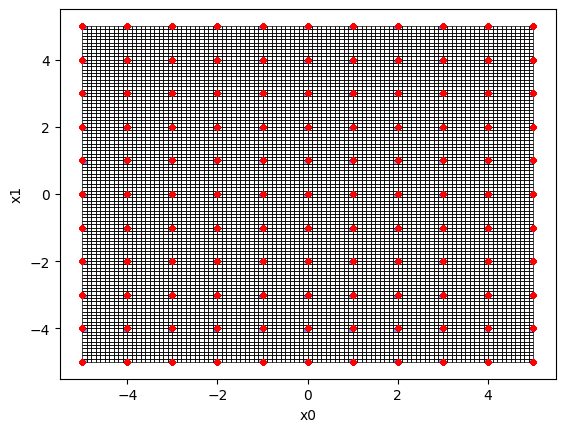

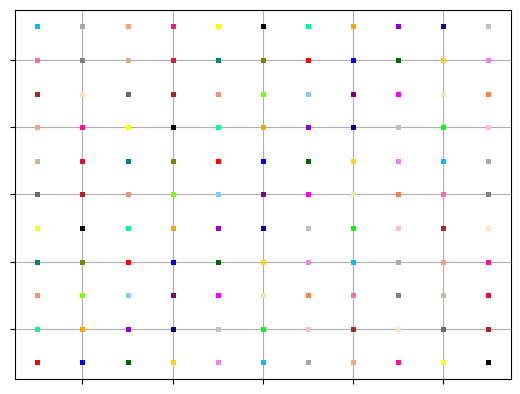

In [54]:
noise = clique_instance.get_noise()     
cells = clique_instance.get_cells()
clique_visualizer.show_grid(cells, data)
clique_visualizer.show_clusters(data, clusters, noise) # Mostrar los resultados de agrupación

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 16.2</p>

<p>Visualizaciones de Cuadrícula y Clúster.</p>

Experimenté con diferentes valores para los parámetros `intervals` y `threshold`. La figura 16.3 muestra los resultados de mis experimentos.  

#### Conjunto de Parámetros 2

Número de Agrupaciones: 67


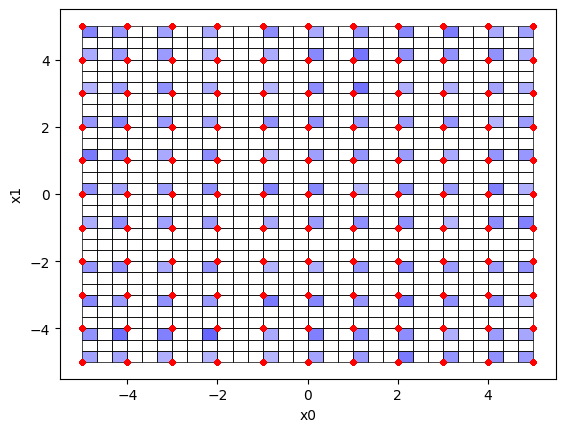

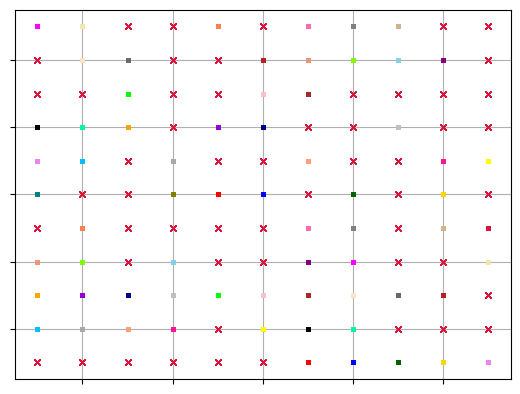

In [55]:
intervals = 30  
threshold = 40   
clique_instance = clique(data, intervals, threshold)
clique_instance.process()
clusters = clique_instance.get_clusters() 
print("Número de Agrupaciones:", len(clusters))
noise = clique_instance.get_noise()     
cells = clique_instance.get_cells()
clique_visualizer.show_grid(cells, data)
clique_visualizer.show_clusters(data, clusters, noise)

#### Conjunto de Parámetros 3

Número de Agrupaciones: 13


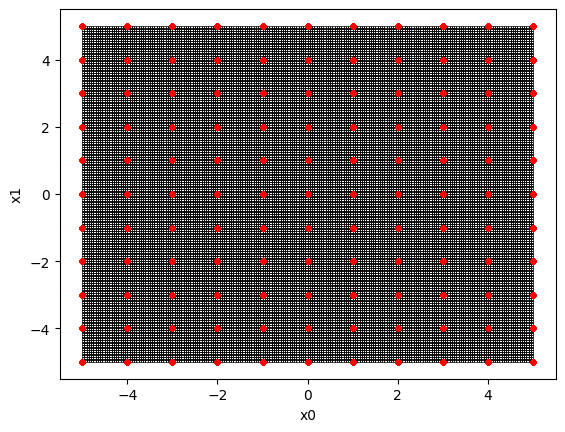

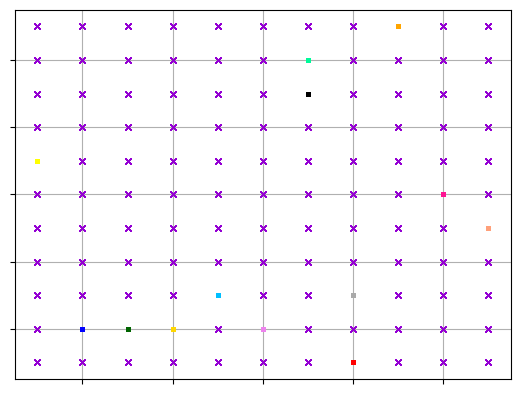

In [56]:
intervals = 200  
threshold = 50   
clique_instance = clique(data, intervals, threshold)
clique_instance.process()
clusters = clique_instance.get_clusters() 
print("Número de Agrupaciones:", len(clusters))
noise = clique_instance.get_noise()     
cells = clique_instance.get_cells()
clique_visualizer.show_grid(cells, data)
clique_visualizer.show_clusters(data, clusters, noise)

#### Conjunto de Parámetros 4

Número de Agrupaciones: 2


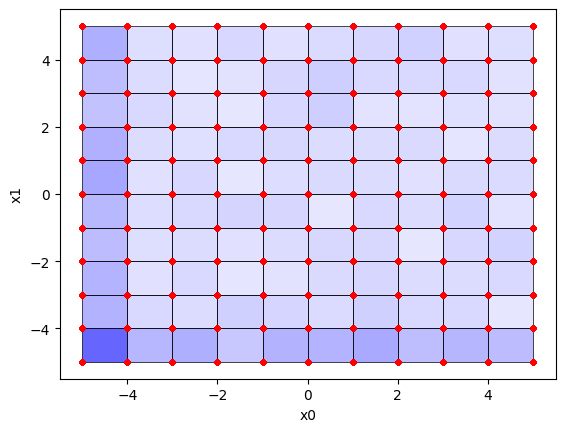

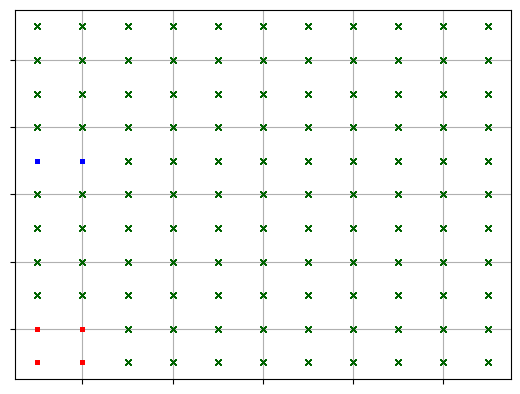

In [57]:
intervals = 10  
threshold = 100   
clique_instance = clique(data, intervals, threshold)
clique_instance.process()
clusters = clique_instance.get_clusters() 
print("Número de Agrupaciones:", len(clusters))
noise = clique_instance.get_noise()     
cells = clique_instance.get_cells()
clique_visualizer.show_grid(cells, data)
clique_visualizer.show_clusters(data, clusters, noise) 

#### Conjunto de Parámetros 5

Número de Agrupaciones: 30


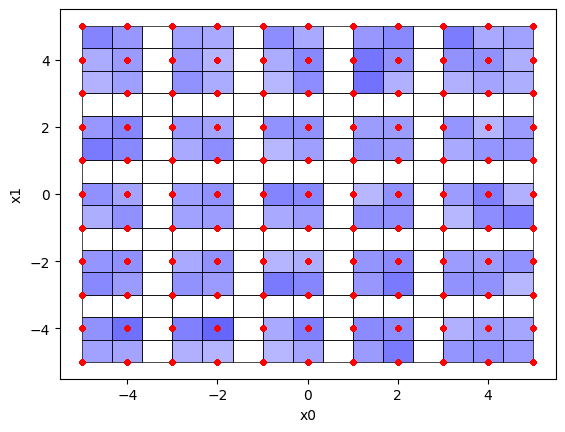

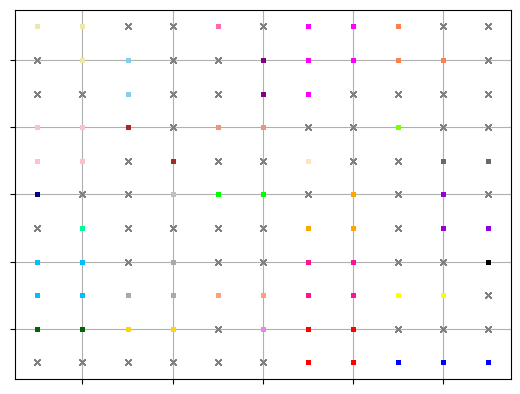

In [58]:
intervals = 15  
threshold = 40   
clique_instance = clique(data, intervals, threshold)
clique_instance.process()
clusters = clique_instance.get_clusters() 
print("Número de Agrupaciones:", len(clusters))
noise = clique_instance.get_noise()     
cells = clique_instance.get_cells()
clique_visualizer.show_grid(cells, data)
clique_visualizer.show_clusters(data, clusters, noise)

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 16.3</p>

<p>Agrupación para varios intervalos (`intervals`) y umbrales (`threshold`).</p>

Como se observa, la agrupación depende en gran medida de los valores de estos dos parámetros.

## Resumen

En este capítulo, estudiaste dos algoritmos para agrupar grandes conjuntos de datos espaciales. El algoritmo *STING* puede responder las consultas sin volver a escanear todo el conjunto de datos y, por lo tanto, se considera independiente de la consulta. *CLIQUE* es un algoritmo de agrupación por subespacios que utiliza un enfoque de abajo hacia arriba para encontrar clusters. Se considera tanto basado en densidad como en cuadrícula. Identifica automáticamente los subespacios de un espacio de datos de alta dimensión y se aplica idealmente a conjuntos de datos de alta dimensionalidad.  

Después de cubrir los diversos algoritmos de agrupación, es momento de pasar a una tecnología que trajo cambios radicales en el aprendizaje automático: la llamamos *ANNs* (*artificial neural networks*).